In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the dataset
df = pd.read_csv('voice_command_dataset.csv')

df.head()

,path,speaker,action,object,fluency_level,current_language,gender,age_range
0,dataset/audio/speakers/2BqVo8kVB2Skwgyb/0a3129...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),female,22-40
1,dataset/audio/speakers/2BqVo8kVB2Skwgyb/0ee42a...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),female,22-40
2,dataset/audio/speakers/2BqVo8kVB2Skwgyb/1d9f39...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),female,22-40
3,dataset/audio/speakers/2BqVo8kVB2Skwgyb/269fc2...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),female,22-40
4,dataset/audio/speakers/2BqVo8kVB2Skwgyb/5bbda3...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),female,22-40


In [9]:
# Laplace Mechanism
def laplace_mechanism(data, epsilon):
    sensitivity = 1  # Assuming changing one record changes the count by at most 1
    noise = np.random.laplace(0, sensitivity / epsilon, size=len(data))
    return data + noise

# Gaussian Mechanism
def gaussian_mechanism(data, epsilon, delta):
    sensitivity = 1
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
    noise = np.random.normal(0, sigma, size=len(data))
    return data + noise


In [12]:
# Apply mechanisms to sensitive attributes
epsilon = 1.0  # Privacy budget
delta = 1e-5   # Failure probability for Gaussian mechanism

# Encode categorical variables
df['speaker_encoded'] = pd.factorize(df['speaker'])[0]
df['gender_encoded'] = pd.factorize(df['gender'])[0]
df['age_range_encoded'] = pd.factorize(df['age_range'])[0]

# Apply Laplace Mechanism to speaker IDs
df['speaker_laplace'] = laplace_mechanism(df['speaker_encoded'], epsilon)

# Apply Gaussian Mechanism to age range
df['age_range_gaussian'] = gaussian_mechanism(df['age_range_encoded'], epsilon, delta)

# Apply Randomized Response to gender (assuming binary encoding)
p = 0.75  # Probability of truthful response
df['gender_randomized'] = randomized_response(df['gender_encoded'], p)

# Print sample results
print(df[['speaker', 'speaker_laplace', 'age_range', 'age_range_gaussian', 'gender', 'gender_randomized']].head(10))

            speaker  speaker_laplace age_range  age_range_gaussian  gender  \
0  2BqVo8kVB2Skwgyb         0.573285     22-40            3.657870  female   
1  2BqVo8kVB2Skwgyb        -1.264411     22-40           -2.556043  female   
2  2BqVo8kVB2Skwgyb        -1.087739     22-40            6.838243  female   
3  2BqVo8kVB2Skwgyb         2.925265     22-40            3.453168  female   
4  2BqVo8kVB2Skwgyb        -0.003479     22-40            3.923749  female   
5  2BqVo8kVB2Skwgyb        -1.766525     22-40            4.015150  female   
6  2BqVo8kVB2Skwgyb         1.769873     22-40            0.209597  female   
7  2BqVo8kVB2Skwgyb        -6.979861     22-40           -2.077770  female   
8  2BqVo8kVB2Skwgyb         0.318808     22-40            2.088832  female   
9  2BqVo8kVB2Skwgyb         0.165649     22-40           -4.794926  female   

   gender_randomized  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  
5  

In [13]:
# Assuming df is already defined with 'speaker' column
# Encode the speaker IDs
df['speaker_encoded'] = pd.factorize(df['speaker'])[0]

# Laplace Mechanism
def laplace_mechanism(data, epsilon):
    sensitivity = 1
    noise = np.random.laplace(0, sensitivity / epsilon, size=len(data))
    return data + noise

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))
original_line, = ax.plot([], [], 'bo', alpha=0.5, label='Original Data')
private_line, = ax.plot([], [], 'ro', alpha=0.5, label='Privatized Data')
ax.set_xlim(0, len(df))
ax.set_ylim(df['speaker_encoded'].min() - 1, df['speaker_encoded'].max() + 1)
ax.set_xlabel('Data Point')
ax.set_ylabel('Speaker ID (encoded)')
ax.legend()
title = ax.set_title('Laplace Mechanism with ε = 0')

# Animation update function
def update(frame):
    epsilon = 0.01 * (10 ** (frame / 20))  # Epsilon ranges from 0.01 to 10
    privatized_data = laplace_mechanism(df['speaker_encoded'], epsilon)
    original_line.set_data(range(len(df['speaker_encoded'])), df['speaker_encoded'])
    private_line.set_data(range(len(privatized_data)), privatized_data)
    title.set_text(f'Laplace Mechanism with ε = {epsilon:.2f}')
    return original_line, private_line, title

# Create the animation
anim = FuncAnimation(fig, update, frames=41, interval=300, blit=True)
anim.save('laplace_mechanism_animation_comparison.gif', writer='pillow', fps=2)
plt.close(fig)
print("Animation saved as 'laplace_mechanism_animation_comparison.gif'")

Animation saved as 'laplace_mechanism_animation_comparison.gif'


In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Encode the speaker IDs
df['speaker_encoded'] = pd.factorize(df['speaker'])[0]

# Laplace Mechanism
def laplace_mechanism(data, epsilon):
    sensitivity = 1
    noise = np.random.laplace(0, sensitivity / epsilon, size=len(data))
    return data + noise

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], 'bo', alpha=0.5)
ax.set_xlim(0, len(df))
ax.set_ylim(df['speaker_encoded'].min() - 1, df['speaker_encoded'].max() + 1)
ax.set_xlabel('Data Point')
ax.set_ylabel('Speaker ID (encoded)')
title = ax.set_title('Laplace Mechanism with ε = 0')

# Animation update function
def update(frame):
    epsilon = 10 ** (frame / 10 - 1)  # Epsilon ranges from 0.1 to 10
    privatized_data = laplace_mechanism(df['speaker_encoded'], epsilon)
    line.set_data(range(len(privatized_data)), privatized_data)
    title.set_text(f'Laplace Mechanism with ε = {epsilon:.2f}')
    return line, title

# Create the animation
anim = FuncAnimation(fig, update, frames=21, interval=300, blit=True)

anim.save('laplace_mechanism_animation2.gif', writer='pillow', fps=2)

plt.close(fig)

print("Animation saved as 'laplace_mechanism_animation.gif'")

Animation saved as 'laplace_mechanism_animation.gif'


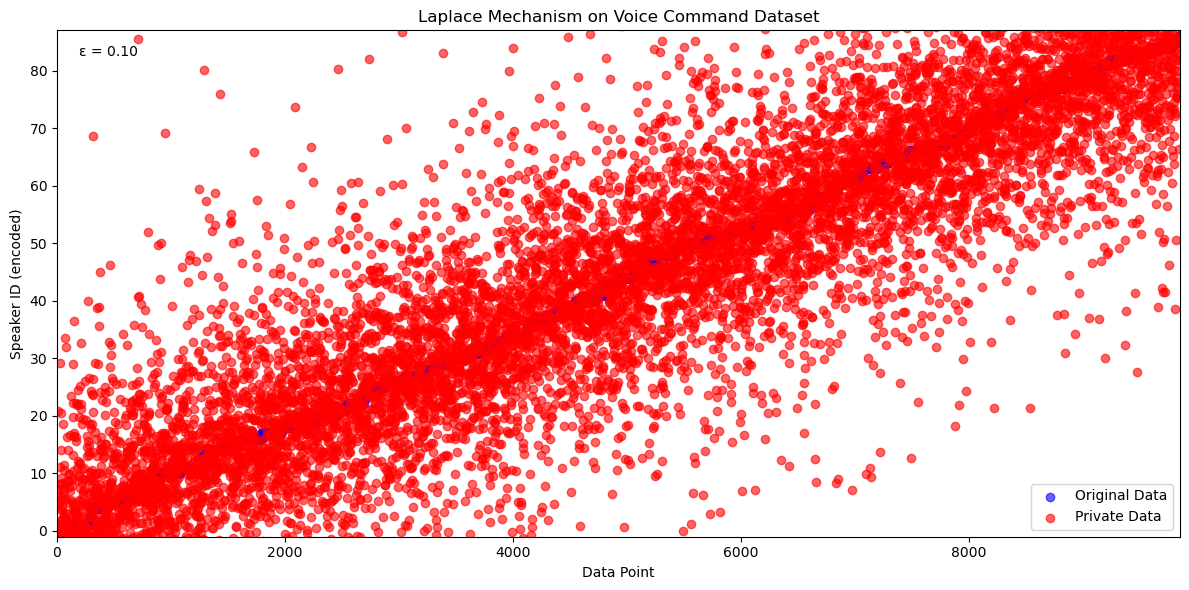

In [11]:
np.random.seed(42)
original_data = np.random.randint(0, 100, size=50)

def laplace_mechanism(data, epsilon):
    sensitivity = 1.0
    noise = np.random.laplace(0, sensitivity / epsilon, size=len(data))
    return data + noise

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
line_original, = ax.plot(original_data, 'bo-', label='Original Data')
line_private, = ax.plot([], [], 'ro-', label='Private Data')
ax.set_ylim(min(original_data) - 10, max(original_data) + 10)
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')
ax.set_title('Laplace Mechanism Visualization')
ax.legend()

# Text annotation for epsilon value
epsilon_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def update(frame):
    epsilon = 10 ** (frame / 20 - 1)  # Epsilon ranges from 0.1 to 10
    private_data = laplace_mechanism(original_data, epsilon)
    line_private.set_data(range(len(private_data)), private_data)
    epsilon_text.set_text(f'ε = {epsilon:.2f}')
    return line_private, epsilon_text

# Create the animation
anim = FuncAnimation(fig, update, frames=41, interval=200, blit=True)

# Display the animation
plt.show()

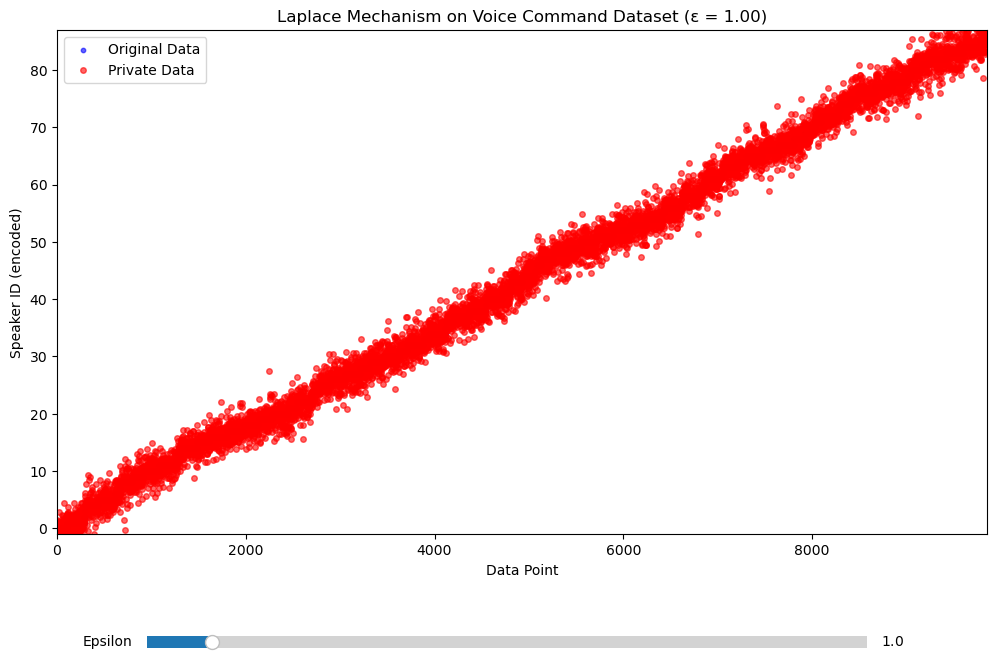

In [3]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Extract speaker IDs and encode them numerically
speakers = df['speaker'].unique()
speaker_to_id = {speaker: idx for idx, speaker in enumerate(speakers)}
speaker_ids = df['speaker'].map(speaker_to_id).values

def laplace_mechanism(data, epsilon):
    sensitivity = 1.0
    noise = np.random.laplace(0, sensitivity / epsilon, size=len(data))
    return data + noise

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.25)

scatter_original = ax.scatter(range(len(speaker_ids)), speaker_ids, c='blue', alpha=0.6, label='Original Data', s=10)
scatter_private, = ax.plot([], [], 'ro', alpha=0.6, label='Private Data', markersize=4)

ax.set_xlim(0, len(speaker_ids))
ax.set_ylim(min(speaker_ids) - 1, max(speaker_ids) + 1)
ax.set_xlabel('Data Point')
ax.set_ylabel('Speaker ID (encoded)')
ax.set_title('Laplace Mechanism on Voice Command Dataset')
ax.legend()

# Add slider for epsilon
ax_epsilon = plt.axes([0.2, 0.1, 0.6, 0.03])
slider_epsilon = Slider(ax_epsilon, 'Epsilon', 0.1, 10, valinit=1, valstep=0.1)

# Update function for slider
def update(val):
    epsilon = slider_epsilon.val
    private_ids = laplace_mechanism(speaker_ids, epsilon)
    scatter_private.set_data(range(len(private_ids)), private_ids)
    ax.set_title(f'Laplace Mechanism on Voice Command Dataset (ε = {epsilon:.2f})')
    fig.canvas.draw_idle()

slider_epsilon.on_changed(update)

# Initial plot
update(1)

plt.show()

# Add privacy on voice command, object, age, and gender

In [9]:
# Prepare categorical data
action_to_id = {action: idx for idx, action in enumerate(df['action'].unique())}
object_to_id = {obj: idx for idx, obj in enumerate(df['object'].unique())}
gender_to_id = {'male': 0, 'female': 1}
df['action_id'] = df['action'].map(action_to_id)
df['object_id'] = df['object'].map(object_to_id)
df['gender_id'] = df['gender'].map(gender_to_id)

# Convert age range to numeric
def convert_age(age_range):
    if age_range == '65+':
        return 65
    else:
        return int(age_range.split('-')[0])

df['age'] = df['age_range'].apply(convert_age)
df.head()

,path,speaker,action,object,fluency_level,current_language,gender,age_range,action_id,object_id,gender_id,age
0,dataset/audio/speakers/2BqVo8kVB2Skwgyb/0a3129...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),female,22-40,0,0,1,22
1,dataset/audio/speakers/2BqVo8kVB2Skwgyb/0ee42a...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),female,22-40,1,1,1,22
2,dataset/audio/speakers/2BqVo8kVB2Skwgyb/1d9f39...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),female,22-40,2,2,1,22
3,dataset/audio/speakers/2BqVo8kVB2Skwgyb/269fc2...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),female,22-40,3,3,1,22
4,dataset/audio/speakers/2BqVo8kVB2Skwgyb/5bbda3...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),female,22-40,3,3,1,22


In [10]:
# Laplace Mechanism
def laplace_mechanism(data, epsilon):
    sensitivity = 1.0
    return data + np.random.laplace(0, sensitivity / epsilon, size=len(data))

# Gaussian Mechanism
def gaussian_mechanism(data, epsilon, delta):
    sensitivity = 1.0
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * (sensitivity / epsilon)
    return data + np.random.normal(0, sigma, size=len(data))

# Randomized Response
def randomized_response(data, p):
    return np.where(np.random.random(len(data)) < p, data, np.random.choice(data, len(data)))


In [11]:
# Create animations for each mechanism and column
def create_animation(original_data, mechanism_func, mechanism_name, column_name, filename):
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter([], [], alpha=0.6)
    ax.set_xlim(0, len(original_data))
    ax.set_ylim(min(original_data) - 1, max(original_data) + 1)
    ax.set_xlabel('Data Point')
    ax.set_ylabel(column_name)
    ax.set_title(f'{mechanism_name} on {column_name}')

    def update(frame):
        if mechanism_name == 'Randomized Response':
            p = frame / 20  # p ranges from 0 to 1
            private_data = mechanism_func(original_data, p)
            ax.set_title(f'{mechanism_name} on {column_name} (p = {p:.2f})')
        else:
            epsilon = 10 ** (frame / 10 - 1)  # epsilon ranges from 0.1 to 10
            if mechanism_name == 'Gaussian Mechanism':
                private_data = mechanism_func(original_data, epsilon, delta=1e-5)
            else:
                private_data = mechanism_func(original_data, epsilon)
            ax.set_title(f'{mechanism_name} on {column_name} (ε = {epsilon:.2f})')
        scatter.set_offsets(np.column_stack((range(len(private_data)), private_data)))
        return scatter,

    anim = FuncAnimation(fig, update, frames=21, interval=200, blit=True)
    anim.save(f'{filename}.gif', writer='pillow', fps=5)
    plt.close(fig)

In [12]:
# Create animations for each column and mechanism
columns = ['action_id', 'object_id', 'gender_id', 'age']
mechanisms = [
    (laplace_mechanism, 'Laplace Mechanism'),
    (gaussian_mechanism, 'Gaussian Mechanism'),
    (randomized_response, 'Randomized Response')
]

for col in columns:
    for mech_func, mech_name in mechanisms:
        create_animation(df[col].values, mech_func, mech_name, col, f'{mech_name.lower().replace(" ", "_")}_{col}')

print("All animations have been created and saved as GIFs.")

All animations have been created and saved as GIFs.
